# WordNet

> Source: https://wordnet.princeton.edu/

In [ ]:
import nltk

nltk.download('omw') # download WordNet Spanish version: https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/LAS-WordNet-una-WordNet-para-el-espa-ol-obtenida-c/8z8d-85m7
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# synsets: sets of synonyms
groups = wn.synsets('carro', lang='spa')
groups

[Synset('car.n.01'),
 Synset('carriage.n.04'),
 Synset('carrier.n.02'),
 Synset('cart.n.01'),
 Synset('chariot.n.02'),
 Synset('cartload.n.01')]

In [ ]:
# explore synsets
for synset in groups:
  print(synset.name(), ' : ', synset.definition())
  for name in synset.lemma_names():
    print(' * ', name)


car.n.01  :  a motor vehicle with four wheels; usually propelled by an internal combustion engine
 *  car
 *  auto
 *  automobile
 *  machine
 *  motorcar
carriage.n.04  :  a machine part that carries something else
 *  carriage
carrier.n.02  :  a self-propelled wheeled vehicle designed specifically to carry something
 *  carrier
cart.n.01  :  a heavy open wagon usually having two wheels and drawn by an animal
 *  cart
chariot.n.02  :  a two-wheeled horse-drawn battle vehicle; used in war and races in ancient Egypt and Greece and Rome
 *  chariot
cartload.n.01  :  the quantity that a cart holds
 *  cartload


In [ ]:
"""
  Sources:
  - http://dlacombejr.github.io/programming/2015/09/28/visualizing-cifar-10-categories-with-wordnet-and-networkx.html
  - http://www.randomhacks.net/2009/12/29/visualizing-wordnet-relationships-as-graphs/
"""

import networkx as nx
import matplotlib.pyplot as plt

def clousure_graph(synset, fn):
  seen = set()
  graph = nx.DiGraph()
  labels = {}

  def recurse(s):
    if not s in seen:
      seen.add(s)
      labels[s.name] = s.name().split('.')[0]
      graph.add_node(s.name)
      for s1 in fn(s):
        graph.add_node(s1.name)
        graph.add_edge(s.name, s1.name)
        recurse(s1)
  recurse(synset)
  return graph, labels

def draw_text_graph(G, labels):
  plt.figure(figsize=(18, 12))
  pos = nx.planar_layout(G, scale=18)
  nx.draw_networkx_nodes(G, pos, node_color="red", linewidths=0, node_size=500)
  nx.draw_networkx_labels(G, pos, font_size=20, labels=labels)
  nx.draw_networkx_edges(G, pos)
  plt.xticks([])
  plt.yticks([])

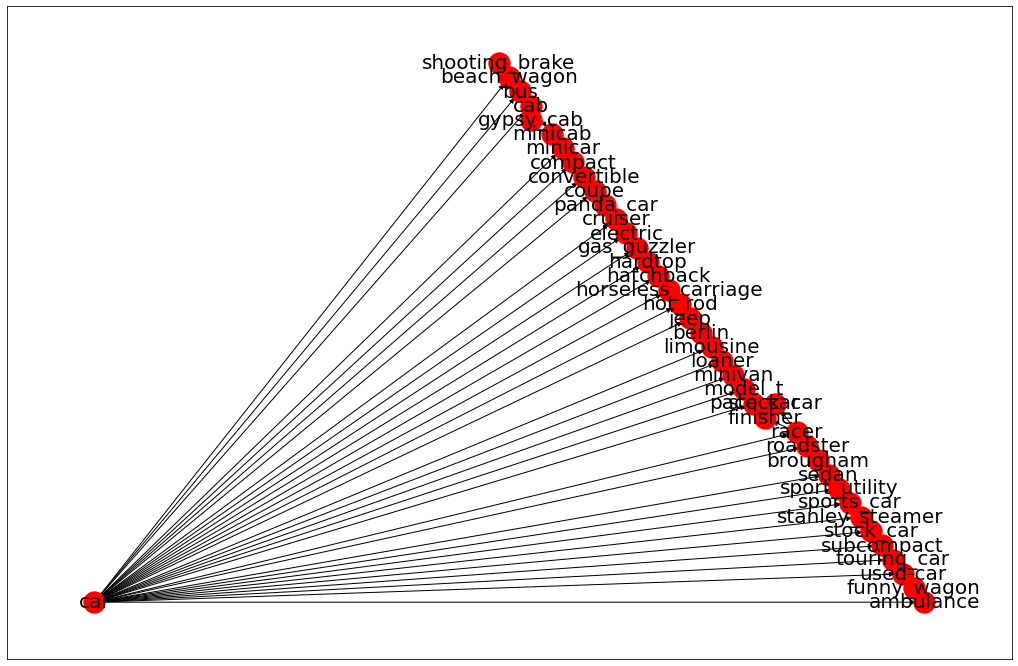

In [ ]:
# Hyponyms: a word of more specific meaning than a general or superordinate term applicable to it.

# groups[0].hyponyms()
G, labels = clousure_graph(groups[0], fn=lambda s: s.hyponyms())
draw_text_graph(G, labels)

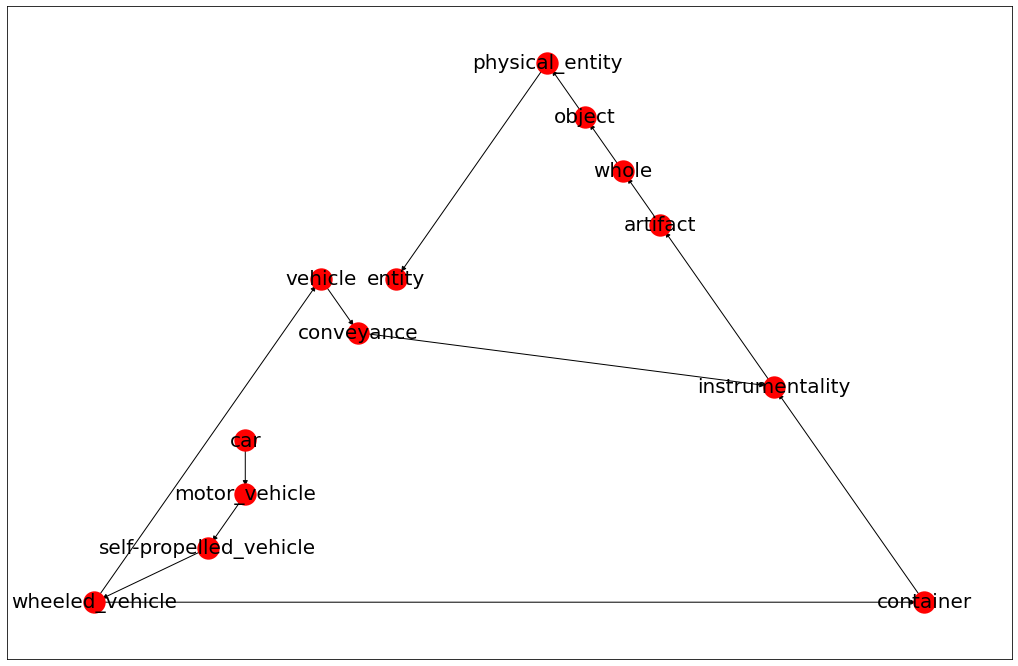

In [ ]:
# Hypernyms: a word with a broad meaning that more specific words fall under; a superordinate.

# groups[0].hypernyms()
G, labels = clousure_graph(groups[0], fn=lambda s: s.hypernyms())
draw_text_graph(G, labels)

## Which is one application of this?

In a **search engine**, we can look for similar words to the ones we typed (e.g. thanks to the WordNet structure).

In [ ]:
# semantic similitude

def show_synsets(word):
  groups = wn.synsets(word, lang='spa')
  for synset in groups:
    print(synset.name(), ' : ', synset.definition())
    for name in synset.lemma_names():
      print(' * ', name)
  
  return groups

In [ ]:
groups = show_synsets('perro')

dog.n.01  :  a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
 *  dog
 *  domestic_dog
 *  Canis_familiaris
rotter.n.01  :  a person who is deemed to be despicable or contemptible
 *  rotter
 *  dirty_dog
 *  rat
 *  skunk
 *  stinker
 *  stinkpot
 *  bum
 *  puke
 *  crumb
 *  lowlife
 *  scum_bag
 *  so-and-so
 *  git


In [ ]:
groups_2 = show_synsets('gato')

cat.n.01  :  feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats
 *  cat
 *  true_cat
tom.n.02  :  male cat
 *  tom
 *  tomcat
dodger.n.01  :  a shifty deceptive person
 *  dodger
 *  fox
 *  slyboots


In [ ]:
groups_3 = show_synsets('animal')

animal.n.01  :  a living organism characterized by voluntary movement
 *  animal
 *  animate_being
 *  beast
 *  brute
 *  creature
 *  fauna
beast.n.02  :  a cruelly rapacious person
 *  beast
 *  wolf
 *  savage
 *  brute
 *  wildcat
dunce.n.01  :  a stupid person; these words are used to express a low opinion of someone's intelligence
 *  dunce
 *  dunderhead
 *  numskull
 *  blockhead
 *  bonehead
 *  lunkhead
 *  hammerhead
 *  knucklehead
 *  loggerhead
 *  muttonhead
 *  shithead
 *  dumbass
 *  fuckhead


In [ ]:
dog = groups[0]
cat = groups_2[0]
animal = groups_3[0]

In [ ]:
# path similarity: distance between words (measuring the amount of vertices between them)
animal.path_similarity(dog)

0.3333333333333333

In [ ]:
animal.path_similarity(cat)

0.125

In [ ]:
# a word which its meaning is identical to the other one, their path similarity is equals to 1. If they are different, the number tend to zero
dog.path_similarity(dog)

1.0